### Setup Environment:

In [1]:
from src.embeddings import get_embeddings_df, load_data, split_dataset, train_and_evaluate_model

# Class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Models
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Support vector machine
from sklearn.svm import SVC
# Decision tree
from sklearn.tree import DecisionTreeClassifier

## Embeddings Generation

* **Batch Size:** Images per batch to convert to embeddings (Adjust depending on your memory)

* **Path:** Path to the images

* **Output Directory:** Directory to save the embeddings

* **Backbone:** Select a backbone from the list of possible backbones:
    * 'dinov2_small'
    * 'dinov2_base'
    * 'dinov2_large'
    * 'dinov2_giant'
    * 'clip_base',
    * 'clip_large',
    * 'convnextv2_tiny'
    * 'convnextv2_base'
    * 'convnextv2_large'
    * 'convnext_tiny'
    * 'convnext_small'
    * 'convnext_base'
    * 'convnext_large'
    * 'swin_tiny'
    * 'swin_small'
    * 'swin_base'
    * 'vit_base'
    * 'vit_large'

In [2]:
# Foundational Models
dino_backbone = ['dinov2_small', 'dinov2_base', 'dinov2_large', 'dinov2_giant']

clip_backbone = ['clip_base', 'clip_large']

# ImageNet:

### Convnext
convnext_backbone = ['convnextv2_tiny', 'convnextv2_base', 'convnextv2_large'] + ['convnext_tiny', 'convnext_small', 'convnext_base', 'convnext_large']

### Swin Transformer
swin_transformer_backbone = ['swin_tiny', 'swin_small', 'swin_base']

### ViT
vit_backbone = ['vit_base', 'vit_large']

backbones = dino_backbone + clip_backbone + convnext_backbone + swin_transformer_backbone + vit_backbone

backbones

['dinov2_small',
 'dinov2_base',
 'dinov2_large',
 'dinov2_giant',
 'clip_base',
 'clip_large',
 'convnextv2_tiny',
 'convnextv2_base',
 'convnextv2_large',
 'convnext_tiny',
 'convnext_small',
 'convnext_base',
 'convnext_large',
 'swin_tiny',
 'swin_small',
 'swin_base',
 'vit_base',
 'vit_large']

In [3]:
# Constants:
# Embeddings Generation:
batch_size = 32
dataset = 'messidor2' # BRSET # messidor2
path = f'../datasets/{dataset}/images/'
backbone = 'dinov2_large' # convnextv2_large # dinov2_large
out_dir = 'Embeddings'

# Modelling:
LABELS_PATH = f'../datasets/{dataset}/labels.csv'
EMBEDDINGS_BACKBONE = backbone
EMBEDDINGS_DIR = f'{out_dir}/{dataset}'
TEST_SIZE = 0.3
CLASS_WEIGTHS = True

In [4]:
#get_embeddings_df(batch_size=batch_size, path=path, dataset_name=dataset, backbone=backbone, directory=out_dir)

## Evaluate the Embeddings

In [5]:
def run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=False, DR_ICDR_3=True):
    
    # Get the dataset
    X, y = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, dataset_name=dataset, normal=NORMAL, DR_ICDR_3=DR_ICDR_3)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=TEST_SIZE)

    # Define a list of models to test
    if CLASS_WEIGTHS:
        class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
        # Create a dictionary from class labels and weights
        class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
        print(f'Setting class weigths to: {class_weights}')

        models = [
            #("Random Forest", RandomForestClassifier(class_weight=class_weights)),
            #('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
            ("SVM", SVC(class_weight=class_weights)),
            ("Logistic Regression", LogisticRegression(class_weight=class_weights))
        ]
    else:
        models = [
            #("Random Forest", RandomForestClassifier()),
            #('Decision Tree', DecisionTreeClassifier()),
            ("SVM", SVC()),
            ("Logistic Regression", LogisticRegression())
        ]

    # Run the experiments
    train_and_evaluate_model(X_train, X_test, y_train, y_test, models=models)

### Diabetic Retinopathy 3 classes

In [6]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = True

Training set size is: 1220 rows and 1024 columns
Test set size is: 524 rows and 1024 columns


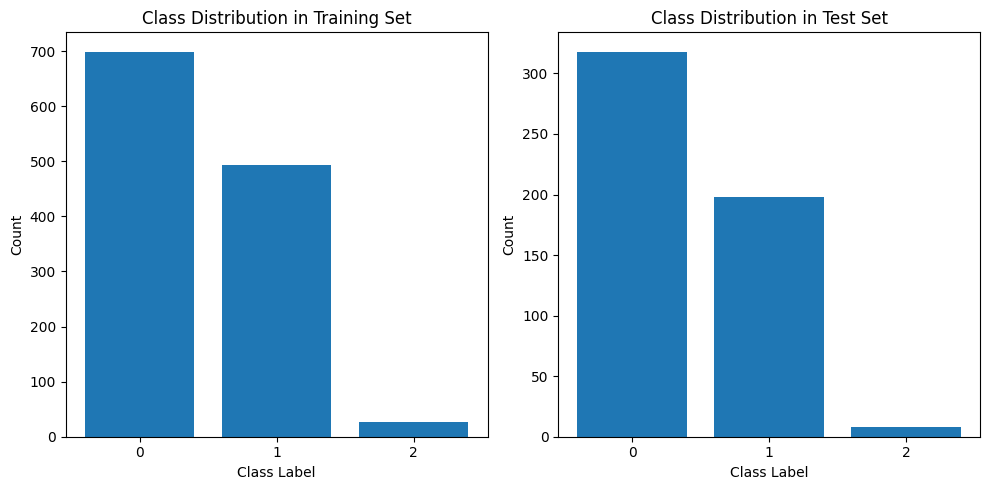

Setting class weigths to: {0: 0.5817835002384358, 1: 0.8232118758434548, 2: 15.061728395061728}


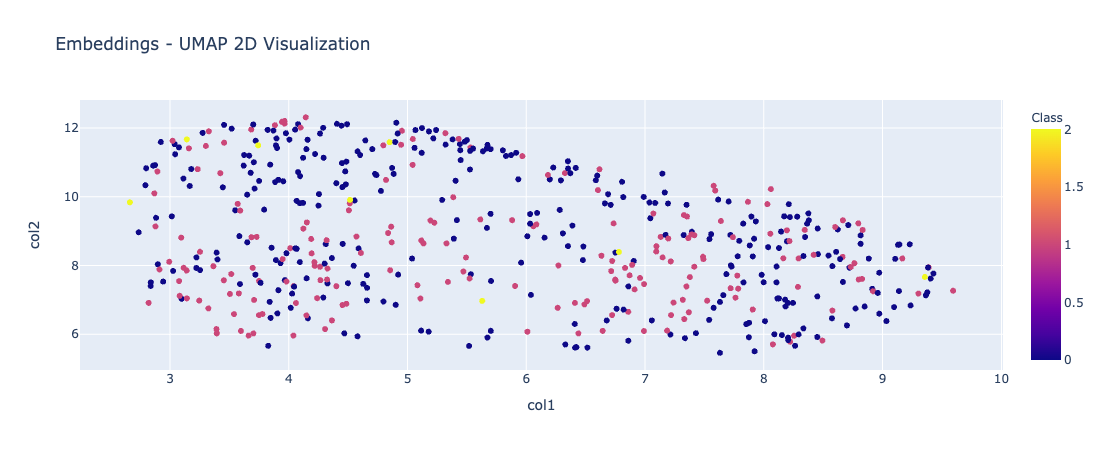

####################  Random Forest  ####################


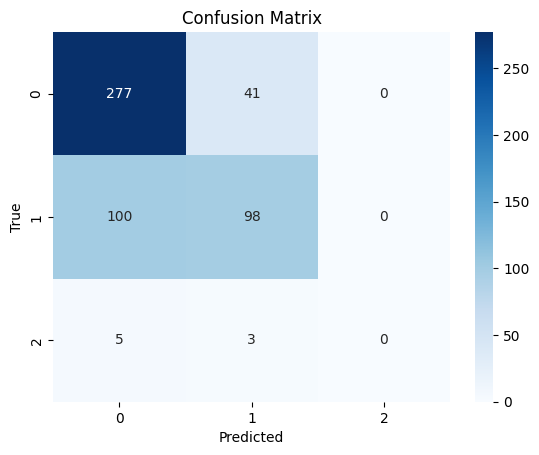

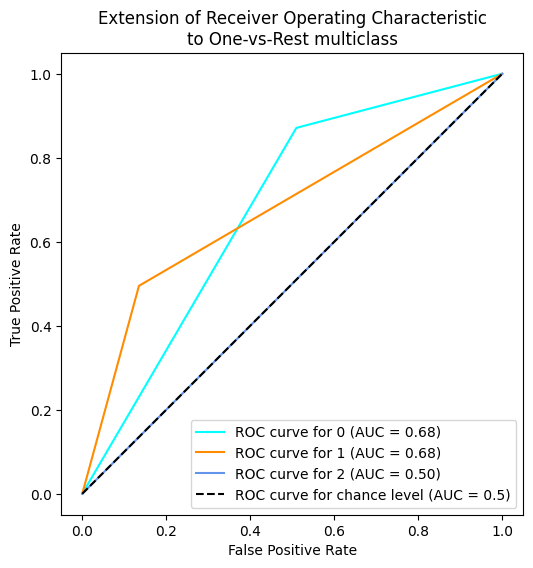

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       318
           1       0.69      0.49      0.58       198
           2       0.00      0.00      0.00         8

    accuracy                           0.72       524
   macro avg       0.47      0.46      0.46       524
weighted avg       0.70      0.72      0.70       524

####################  Decision Tree  ####################


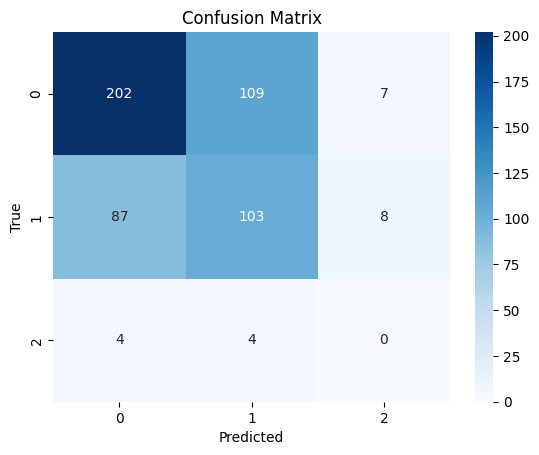

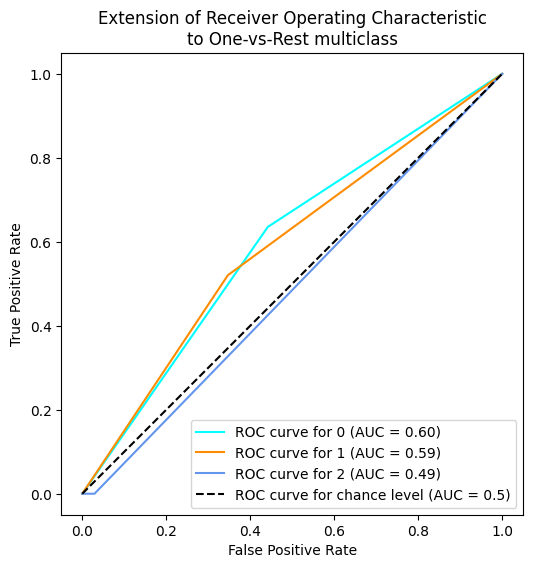

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       318
           1       0.48      0.52      0.50       198
           2       0.00      0.00      0.00         8

    accuracy                           0.58       524
   macro avg       0.39      0.39      0.39       524
weighted avg       0.60      0.58      0.59       524

####################  SVM  ####################


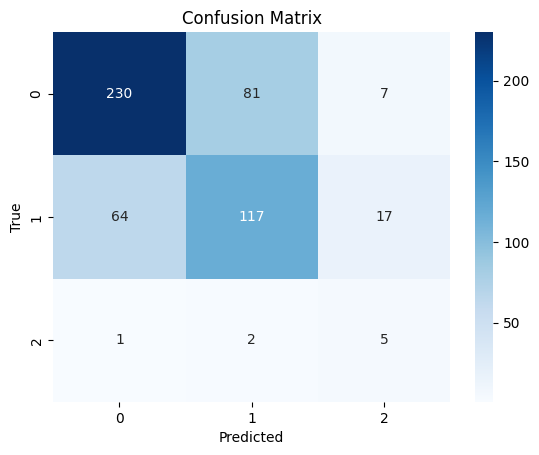

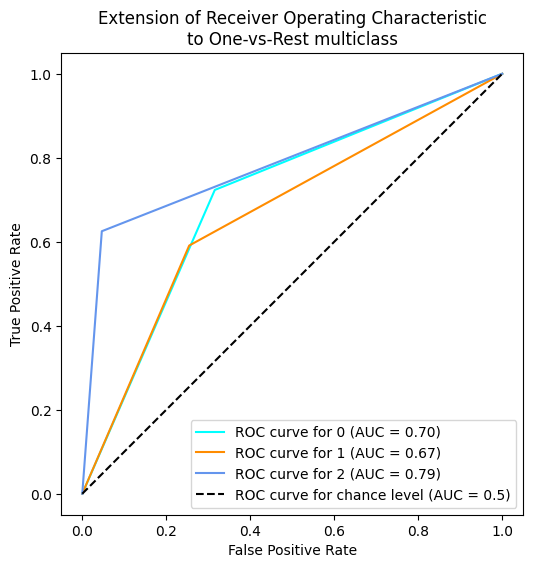

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       318
           1       0.58      0.59      0.59       198
           2       0.17      0.62      0.27         8

    accuracy                           0.67       524
   macro avg       0.51      0.65      0.54       524
weighted avg       0.70      0.67      0.68       524

####################  Logistic Regression  ####################


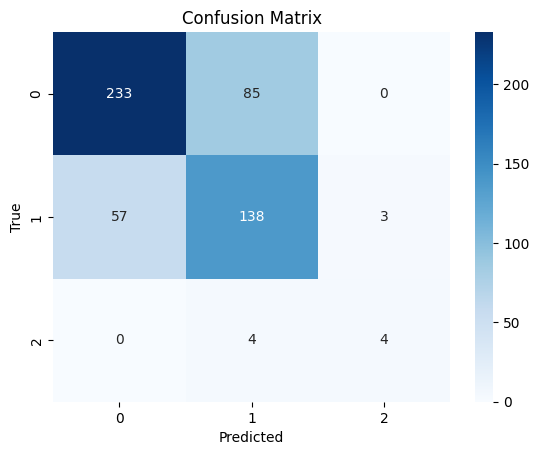

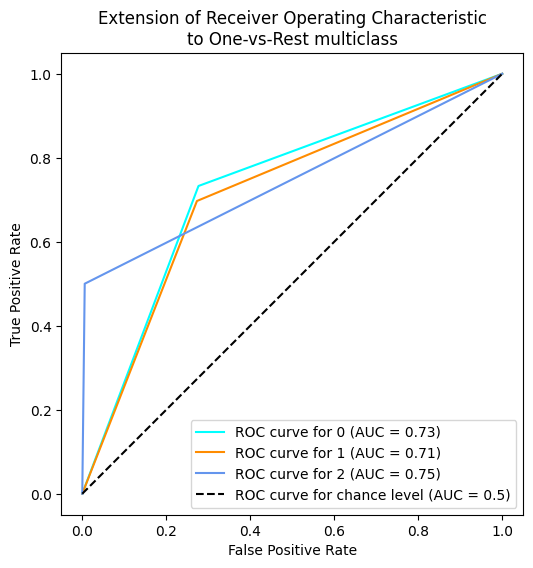

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       318
           1       0.61      0.70      0.65       198
           2       0.57      0.50      0.53         8

    accuracy                           0.72       524
   macro avg       0.66      0.64      0.65       524
weighted avg       0.73      0.72      0.72       524



In [7]:
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3)

### Diabetic Retinopathy 5 classes

In [8]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = False

Training set size is: 1220 rows and 1024 columns
Test set size is: 524 rows and 1024 columns


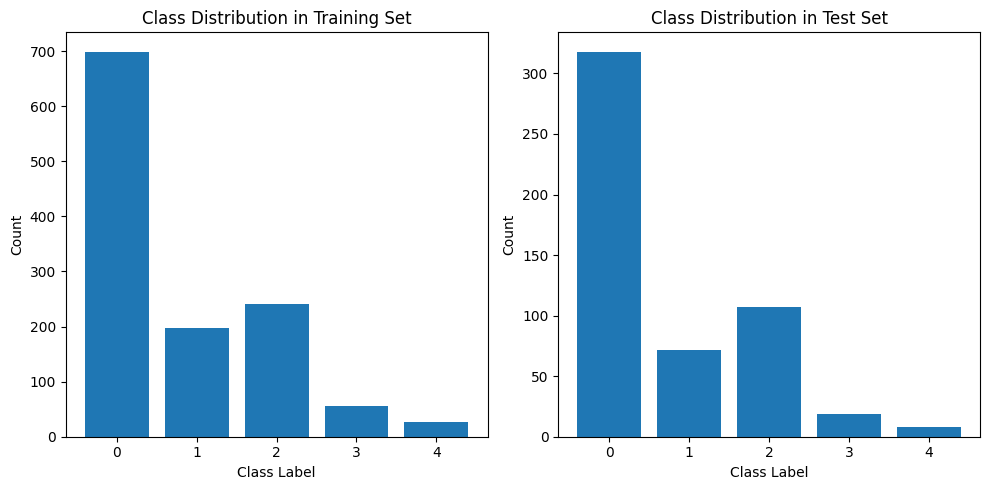

Setting class weigths to: {0: 0.3490701001430615, 1: 1.2323232323232323, 2: 1.0166666666666666, 3: 4.357142857142857, 4: 9.037037037037036}


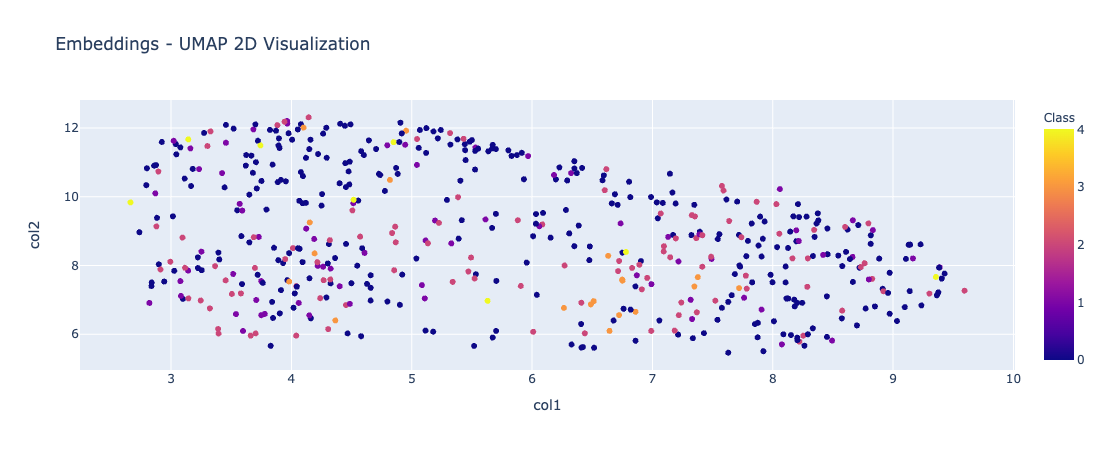

####################  Random Forest  ####################


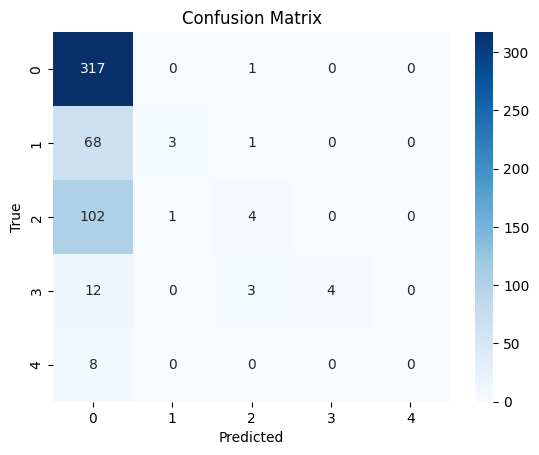

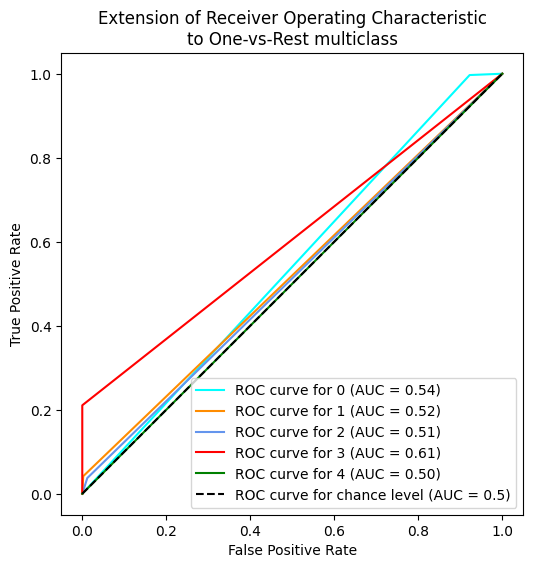

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       318
           1       0.75      0.04      0.08        72
           2       0.44      0.04      0.07       107
           3       1.00      0.21      0.35        19
           4       0.00      0.00      0.00         8

    accuracy                           0.63       524
   macro avg       0.56      0.26      0.25       524
weighted avg       0.61      0.63      0.50       524

####################  Decision Tree  ####################


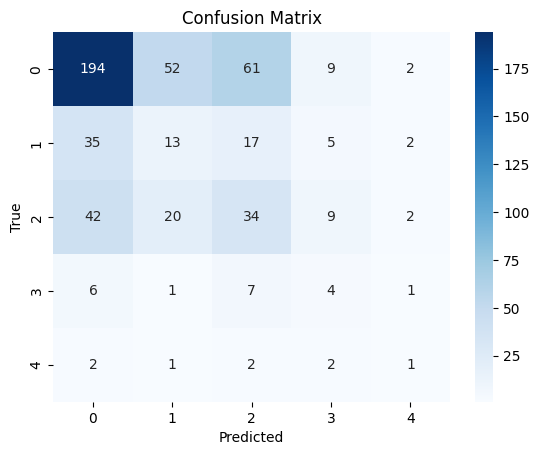

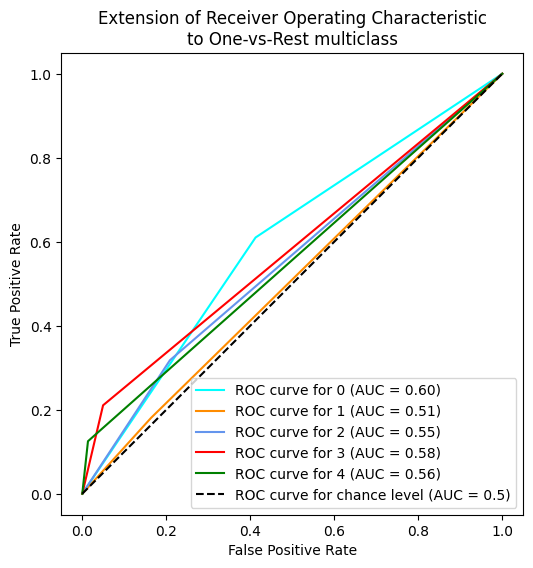

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       318
           1       0.15      0.18      0.16        72
           2       0.28      0.32      0.30       107
           3       0.14      0.21      0.17        19
           4       0.12      0.12      0.12         8

    accuracy                           0.47       524
   macro avg       0.28      0.29      0.28       524
weighted avg       0.51      0.47      0.49       524

####################  SVM  ####################


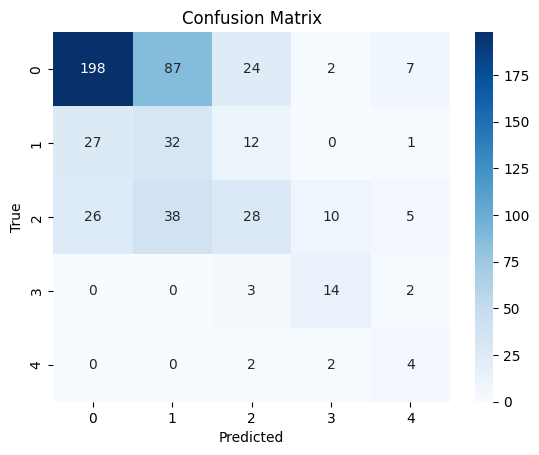

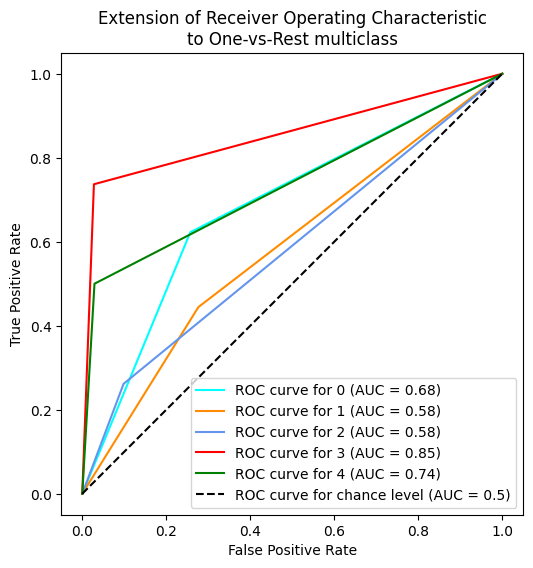

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       318
           1       0.20      0.44      0.28        72
           2       0.41      0.26      0.32       107
           3       0.50      0.74      0.60        19
           4       0.21      0.50      0.30         8

    accuracy                           0.53       524
   macro avg       0.42      0.51      0.44       524
weighted avg       0.61      0.53      0.55       524

####################  Logistic Regression  ####################


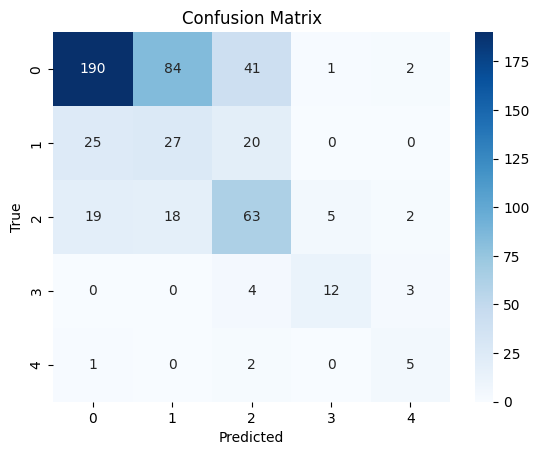

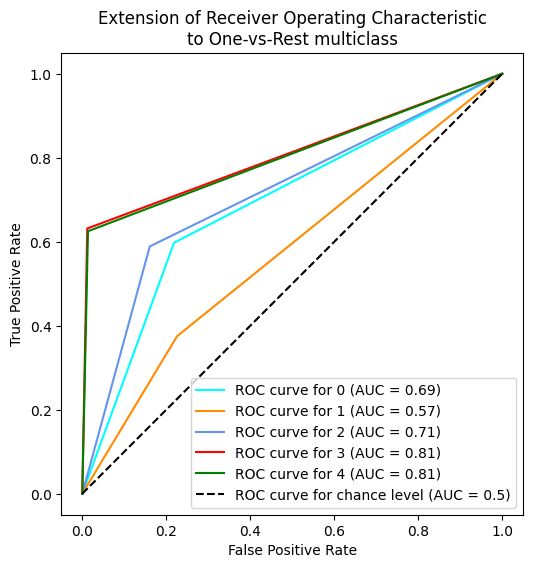

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       318
           1       0.21      0.38      0.27        72
           2       0.48      0.59      0.53       107
           3       0.67      0.63      0.65        19
           4       0.42      0.62      0.50         8

    accuracy                           0.57       524
   macro avg       0.52      0.56      0.53       524
weighted avg       0.65      0.57      0.59       524



In [9]:
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3)